In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.read_csv('weibo_data_simple.csv', header=0)

In [3]:
data.columns

Index([u'_id_x', u'fans_num', u'follows_num', u'gender', u'tweets_num',
       u'vip_level', u'default_name_cat', u'garbled_name_cat', u'en_name_cat',
       u'ch_name_cat', u'bi_device', u'bi_authentication',
       u'bi_brief_introduction', u'bi_city', u'bi_sentiment',
       u'bi_sex_orientation', u'bi_bd', u'bi_labels', u'bi_vip', u'bi_content',
       u'bi_province', u'followers_cat', u'Effective'],
      dtype='object')

In [4]:
data.dtypes

_id_x                      int64
fans_num                 float64
follows_num              float64
gender                     int64
tweets_num               float64
vip_level                  int64
default_name_cat           int64
garbled_name_cat           int64
en_name_cat                int64
ch_name_cat                int64
bi_device                  int64
bi_authentication          int64
bi_brief_introduction      int64
bi_city                    int64
bi_sentiment               int64
bi_sex_orientation         int64
bi_bd                      int64
bi_labels                  int64
bi_vip                     int64
bi_content                 int64
bi_province                int64
followers_cat              int64
Effective                  int64
dtype: object

In [5]:
data.head()

,_id_x,fans_num,follows_num,gender,tweets_num,vip_level,default_name_cat,garbled_name_cat,en_name_cat,ch_name_cat,...,bi_city,bi_sentiment,bi_sex_orientation,bi_bd,bi_labels,bi_vip,bi_content,bi_province,followers_cat,Effective
0,6730618127,1.0,5.0,0,61.0,0,1,1,0,0,...,1,0,0,1,1,0,1,0,1,0
1,1979866143,618.0,205.0,1,8077.0,1,0,0,0,0,...,1,0,0,1,1,1,0,0,0,1
2,6047176678,32.0,136.0,1,236.0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
3,1947719030,20.0,43.0,1,782.0,1,0,0,1,0,...,0,0,0,1,1,1,1,1,0,0
4,6495821902,269.0,215.0,1,664.0,3,0,0,0,0,...,0,0,0,1,1,1,1,0,0,1


In [6]:
data.isnull().any()

_id_x                    False
fans_num                 False
follows_num              False
gender                   False
tweets_num               False
vip_level                False
default_name_cat         False
garbled_name_cat         False
en_name_cat              False
ch_name_cat              False
bi_device                False
bi_authentication        False
bi_brief_introduction    False
bi_city                  False
bi_sentiment             False
bi_sex_orientation       False
bi_bd                    False
bi_labels                False
bi_vip                   False
bi_content               False
bi_province              False
followers_cat            False
Effective                False
dtype: bool

In [7]:
len(data)

10411

In [8]:
data['Effective'].value_counts()

1    6000
0    4411
Name: Effective, dtype: int64

## plots

In [9]:
import seaborn as sns

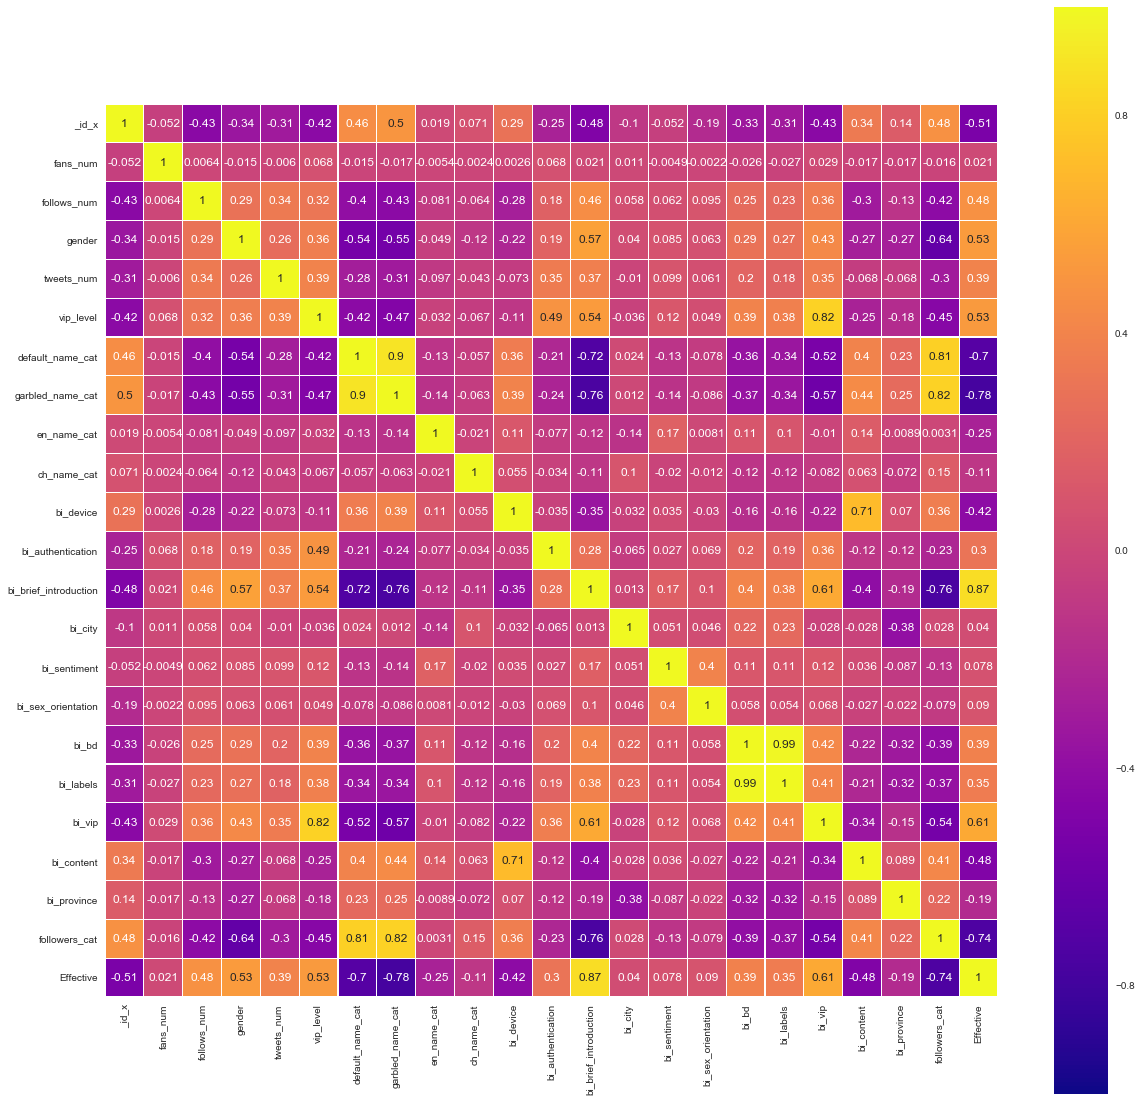

In [10]:
# heatmap
colormap =  plt.cm.plasma
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0, 
            square = True, cmap = colormap, linecolor = 'white', annot = True)

In [11]:
# gender
gender_data = data[['gender']].copy()
gender_count = gender_data.groupby(['gender']).size().reset_index(name='counts')
gender_data = gender_data.replace([0], 'Male')
gender_data = gender_data.replace([1], 'Female')

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


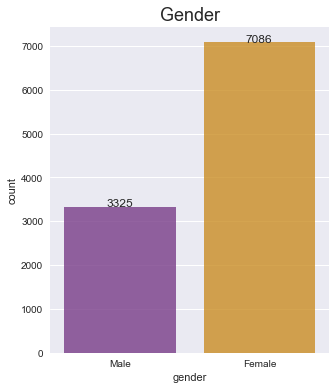

In [12]:
fig, ax = plt.subplots(figsize=(5, 6))
ax = sns.countplot(gender_data['gender'], alpha=0.8, palette='CMRmap')
plt.title('Gender', fontsize=18)
for p, label in zip(ax.patches, gender_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))

In [13]:
# vip level
data['vip_level'].unique()

array([0, 1, 3, 4, 6, 5, 2, 7])

In [14]:
vip_lv_count = data.groupby(['vip_level']).size().reset_index(name='counts')

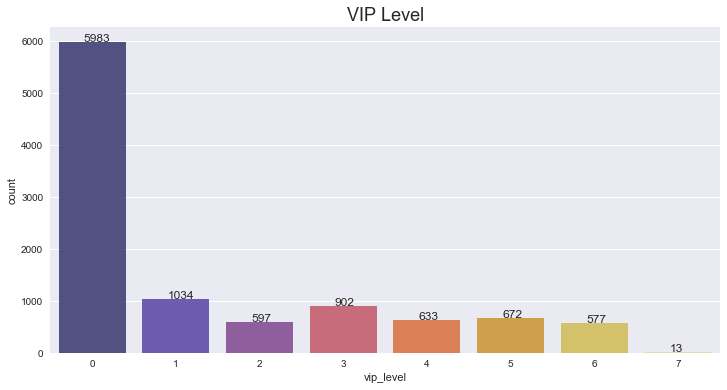

In [15]:
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.countplot(data['vip_level'], alpha=0.8, palette='CMRmap')
plt.title('VIP Level', fontsize=18)
for p, label in zip(ax.patches, vip_lv_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

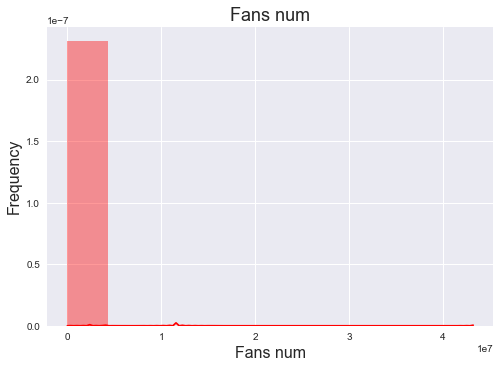

In [16]:
sns.distplot(data['fans_num'], kde=True, color='red', bins=10)
plt.title('Fans num', fontsize=18)
plt.xlabel('Fans num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

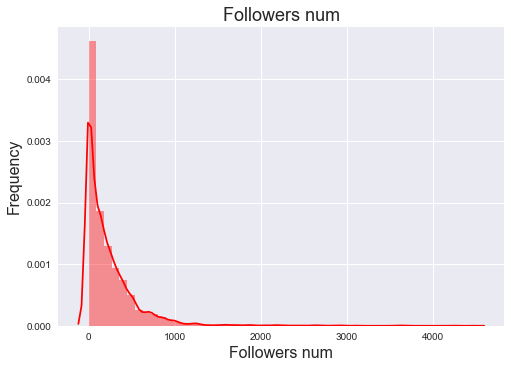

In [17]:
sns.distplot(data['follows_num'], kde=True, color='red', bins=50)
plt.title('Followers num', fontsize=18)
plt.xlabel('Followers num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Frequency')

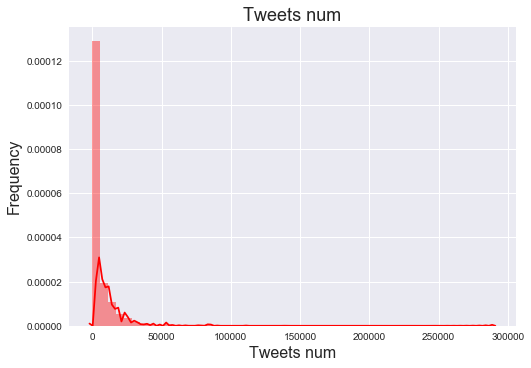

In [18]:
sns.distplot(data['tweets_num'], kde=True, color='red', bins=50)
plt.title('Tweets num', fontsize=18)
plt.xlabel('Tweets num', fontsize=16)
plt.ylabel('Frequency', fontsize=16)

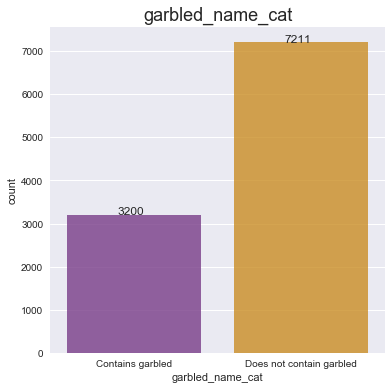

In [19]:
# garbled_name_cat
garbled_data = data[['garbled_name_cat']].copy()
garbled_count = garbled_data.groupby(['garbled_name_cat']).size().reset_index(name='counts')
garbled_count = garbled_count.sort_values(by=['counts'])
garbled_data = garbled_data.replace([0], 'Does not contain garbled')
garbled_data = garbled_data.replace([1], 'Contains garbled')

fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.countplot(garbled_data['garbled_name_cat'], alpha=0.8, palette='CMRmap')
plt.title('garbled_name_cat', fontsize=18)
for p, label in zip(ax.patches, garbled_count['counts']):
    ax.annotate(label, (p.get_x()+0.3, p.get_height()+5))

## upsampling

In [24]:
from sklearn.utils import resample

In [25]:
data_majority = data[data['Effective']==1]
data_minority = data[data['Effective']==0]

data_minority_upsampled = resample(data_minority, replace=True, n_samples=6000, random_state=1)
data = pd.concat([data_majority, data_minority_upsampled])

data['Effective'].value_counts()

1    6000
0    6000
Name: Effective, dtype: int64

## logistic regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [27]:
X = data.drop(labels=['Effective', '_id_x'], axis=1)
Y = data['Effective'].values

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [29]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
from sklearn import metrics

In [31]:
test_prediction = lr.predict(X_test)

In [32]:
print(metrics.accuracy_score(Y_test, test_prediction))

0.9433333333333334


### ROC curve

In [33]:
from sklearn.metrics import roc_curve, auc

In [34]:
probs = lr.predict_proba(X_test)

In [35]:
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

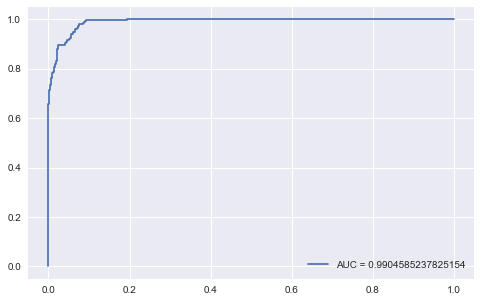

In [36]:
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label="AUC = "+str(roc_auc))
plt.legend(loc=4)
plt.show()

### feature importance

In [37]:
weights = pd.Series(lr.coef_[0], index=X.columns.values)
weights = weights.sort_values(ascending=False)

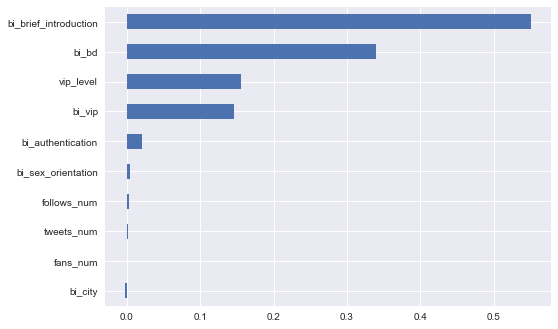

In [38]:
weights.nlargest(10).plot(kind='barh').invert_yaxis()

## cross validation

In [39]:
from sklearn.model_selection import KFold,cross_val_score

In [40]:
k_fold = KFold(n_splits=10)

In [41]:
lr_model = LogisticRegression()

In [42]:
kf_scores = np.array([])

In [43]:
for train, test in k_fold.split(X):
    temp = lr_model.fit(X.iloc[train, :], Y[train]).score(X.iloc[test, :], Y[test])
    kf_scores = np.append(kf_scores, temp)

In [44]:
kf_scores.mean()

0.9281666666666668